In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import numpy as np
from tqdm.notebook import tqdm

In [2]:
rows_count, col_count = 10000, 1
targets = 2
X, y = make_regression(n_samples=rows_count, n_features=col_count, noise=6, random_state=42, n_targets=targets)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, shuffle=True)

In [3]:
from utils.linear_regression import mse, forward, train_linear_regressor_multivariate

losses, parameters, gradients, current_parameters = train_linear_regressor_multivariate(X_train, y_train)

Epochs:   0%|          | 0/31 [00:00<?, ?it/s]

Epoch 0, loss: 610.526014
Epoch 1, loss: 400.536823
Epoch 2, loss: 267.270139
Epoch 3, loss: 182.694313
Epoch 4, loss: 129.019455
Epoch 5, loss: 94.955462
Epoch 6, loss: 73.337229
Epoch 7, loss: 59.617521
Epoch 8, loss: 50.910502
Epoch 9, loss: 45.384714
Epoch 10, loss: 41.877851
Epoch 11, loss: 39.652270
Epoch 12, loss: 38.239836
Epoch 13, loss: 37.343455
Epoch 14, loss: 36.774579
Epoch 15, loss: 36.413550
Epoch 16, loss: 36.184428
Epoch 17, loss: 36.039019
Epoch 18, loss: 35.946737
Epoch 19, loss: 35.888172
Epoch 20, loss: 35.851004
Epoch 21, loss: 35.827416
Epoch 22, loss: 35.812446
Epoch 23, loss: 35.802946
Epoch 24, loss: 35.796917
Epoch 25, loss: 35.793090
Epoch 26, loss: 35.790662
Epoch 27, loss: 35.789121
Epoch 28, loss: 35.788143
Epoch 29, loss: 35.787522
Epoch 30, loss: 35.787128


In [4]:
y_pred = forward(X_test, current_parameters)
print(f'Mean Squared Error: {mse(y_test, y_pred)}')
print(f'Parameters: {current_parameters.ravel()}')

Mean Squared Error: 35.66193252567117
Parameters: [32.02007705 10.17493656]


In [5]:
parameters = np.array(parameters)
parameters = np.moveaxis(parameters, 1, 2)

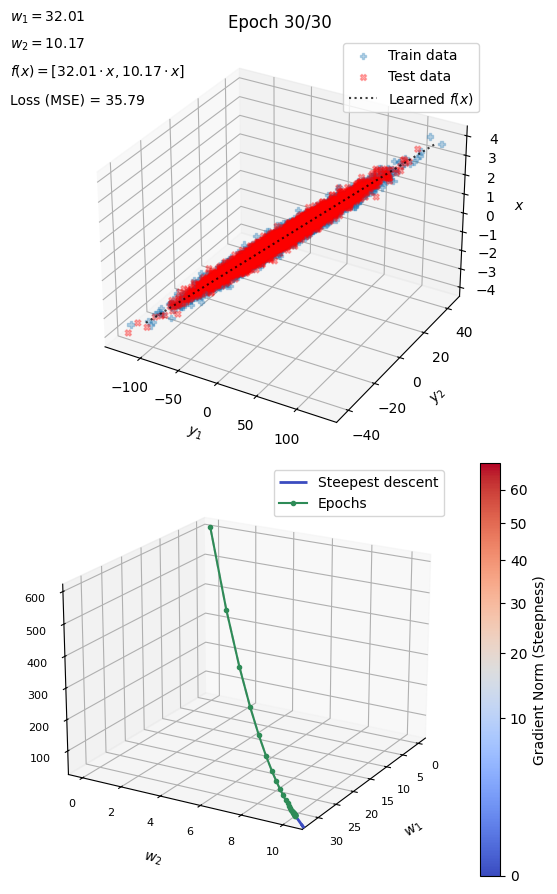

In [6]:
from matplotlib import pyplot as plt
from utils.plot_training import plot_training, plot_3D_loss
from utils.linear_regression import plot_3D_line_model

fig = plt.figure(figsize=(6, 9))

ax1 = fig.add_subplot(211, projection='3d')
ax2 = fig.add_subplot(212, projection='3d')

ax2.view_init(elev=20, azim=30)

def plot_text(epoch_parameters, epoch_loss, text_w1, text_w2, text_fn, text_loss):
    text_w1.set_horizontalalignment('left')
    text_w2.set_horizontalalignment('left')
    text_fn.set_horizontalalignment('left')
    text_loss.set_horizontalalignment('left')
    
    text_w1.set_position((0.05, 0.97))
    text_w2.set_position((0.05, 0.94))
    text_fn.set_position((0.05, 0.91))
    text_loss.set_position((0.05, 0.88))

    text_w1.set_text(rf'$w_1 = {epoch_parameters[0]:.2f}$')
    text_w2.set_text(rf'$w_2 = {epoch_parameters[1]:.2f}$')

    text_fn.set_text(rf'$f(x) = [{epoch_parameters[0]:.2f} \cdot x, {epoch_parameters[1]:.2f} \cdot x]$')

    text_loss.set_text(f'Loss (MSE) = {epoch_loss:.2f}')

def plot_other():
    ax1.set_xlabel(r'$y_1$')
    ax1.set_ylabel(r'$y_2$')
    ax1.set_zlabel(r'$x$')

    ax1.legend(loc='upper right')
    
    ax2.set_xlabel(r'$w_1$', labelpad=10)
    ax2.set_ylabel(r'$w_2$', labelpad=10)
    ax2.set_zlabel('Loss (MSE)', labelpad=10)

    ax2.legend()

frame_buffers = plot_training(fig, ax1, ax2, losses, parameters, gradients, X_train, y_train, X_test, y_test,
    plot_3D_line_model,
    plot_3D_loss,
    plot_text,
    plot_other
)

In [7]:
from utils.plot_training import save_animation

experiment_name = '3D_linear_regression_multivariate'
save_animation(frame_buffers, experiment_name)